In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score, recall_score



In [2]:

# Loading the dataset
df = pd.read_csv(r'C:\Users\villain\OneDrive\Desktop\Data analytics\data mining\project ideas\Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
print("-----------Information-----------")
print(df.info())


-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [4]:
numerical = [var for var in df.columns if df[var].dtype!='O'] 
categorical = [var for var in df.columns if df[var].dtype == 'O']
print("Numerical: ", numerical)
print("Caregorical: ", categorical)

Numerical:  ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Caregorical:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


# Data cleaning and preprocessing

In [5]:
# converting the totalcharges to numeric type and converting non-numeric values to NaN
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
#df

In [6]:
df.select_dtypes(include='object').head() # looking at all the categorical datas present in the dataset

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
print("----------Missing value-----------")
print(df.isna().sum())
print("----------Null value-----------")
print(df.isnull().sum())

----------Missing value-----------
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
----------Null value-----------
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0


In [9]:
#filling all the null values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df.isna().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [11]:


# defining the columns to encode
columns_to_encode = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                    'Churn']

# creating a LabelEncoder instance
le = LabelEncoder()

# encoding each column in the loop
for col in columns_to_encode:
    le.fit(df[col])
    df[f'{col}_encoded'] = le.transform(df[col])
    print(f'{col} unique',df[col].unique())
    
    
df.head()


gender unique ['Female' 'Male']
Partner unique ['Yes' 'No']
Dependents unique ['No' 'Yes']
PhoneService unique ['No' 'Yes']
MultipleLines unique ['No phone service' 'No' 'Yes']
InternetService unique ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique ['No' 'Yes' 'No internet service']
OnlineBackup unique ['Yes' 'No' 'No internet service']
DeviceProtection unique ['No' 'Yes' 'No internet service']
TechSupport unique ['No' 'Yes' 'No internet service']
StreamingTV unique ['No' 'Yes' 'No internet service']
StreamingMovies unique ['No' 'Yes' 'No internet service']
Contract unique ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique ['Yes' 'No']
PaymentMethod unique ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique ['No' 'Yes']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,0,1,2,1


In [12]:
df.drop(columns=['customerID','gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                    'Churn'], inplace=True)#dropping as they are not required
df.describe()
print(df.shape)
df.head()

(7043, 20)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [14]:
# dropping duplicates in the dataset
df.drop_duplicates(inplace=True)

In [15]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


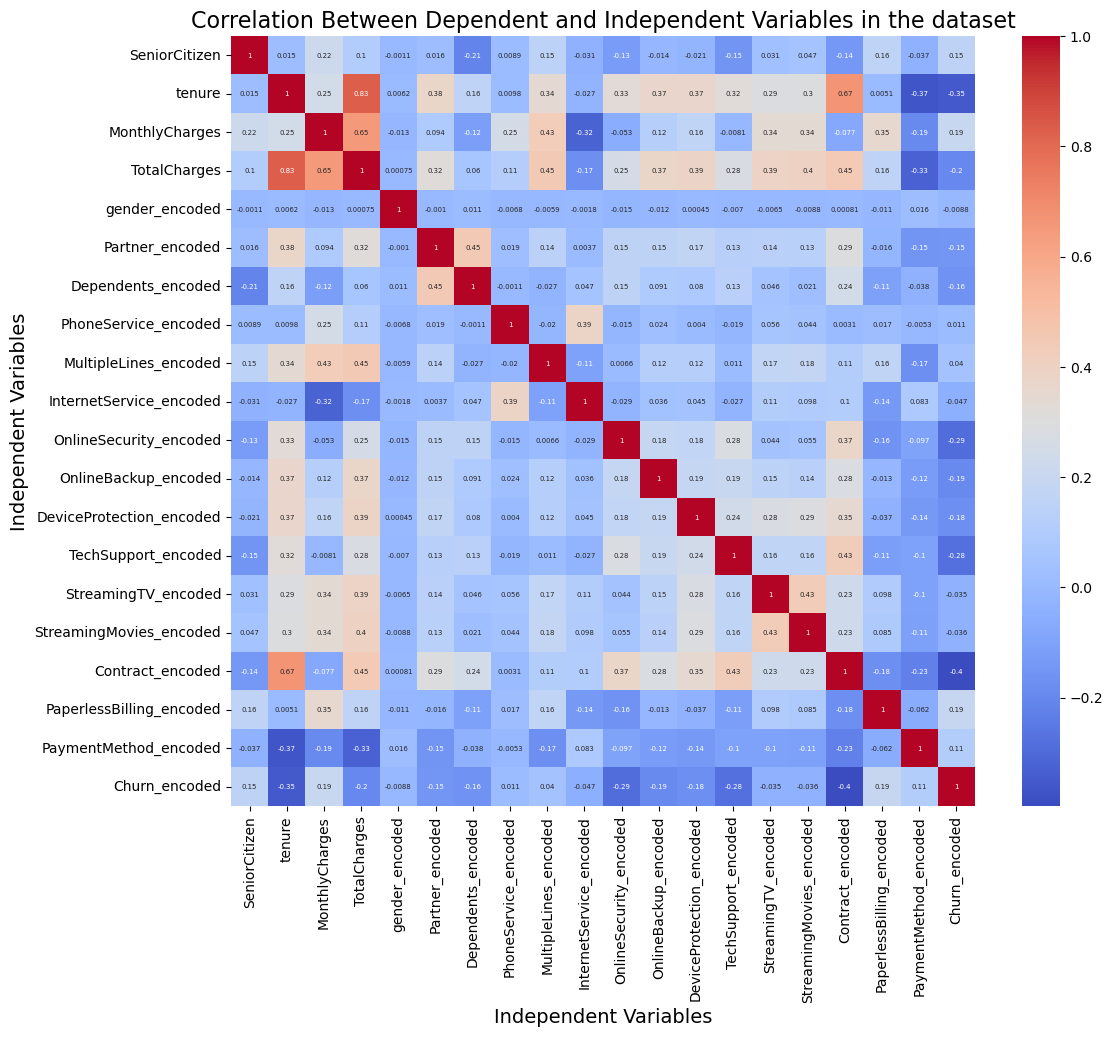

In [16]:
# Computing the correlation matrix
corr = df.corr()

# Setting the figure size
plt.figure(figsize=(12, 10))

# Creating the correlation graph
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 5})

# Adding axis labels and title
plt.xlabel('Independent Variables', fontsize=14)
plt.ylabel('Independent Variables', fontsize=14)
plt.title('Correlation Between Dependent and Independent Variables in the dataset', fontsize=16)

# Showing the plot
plt.show()

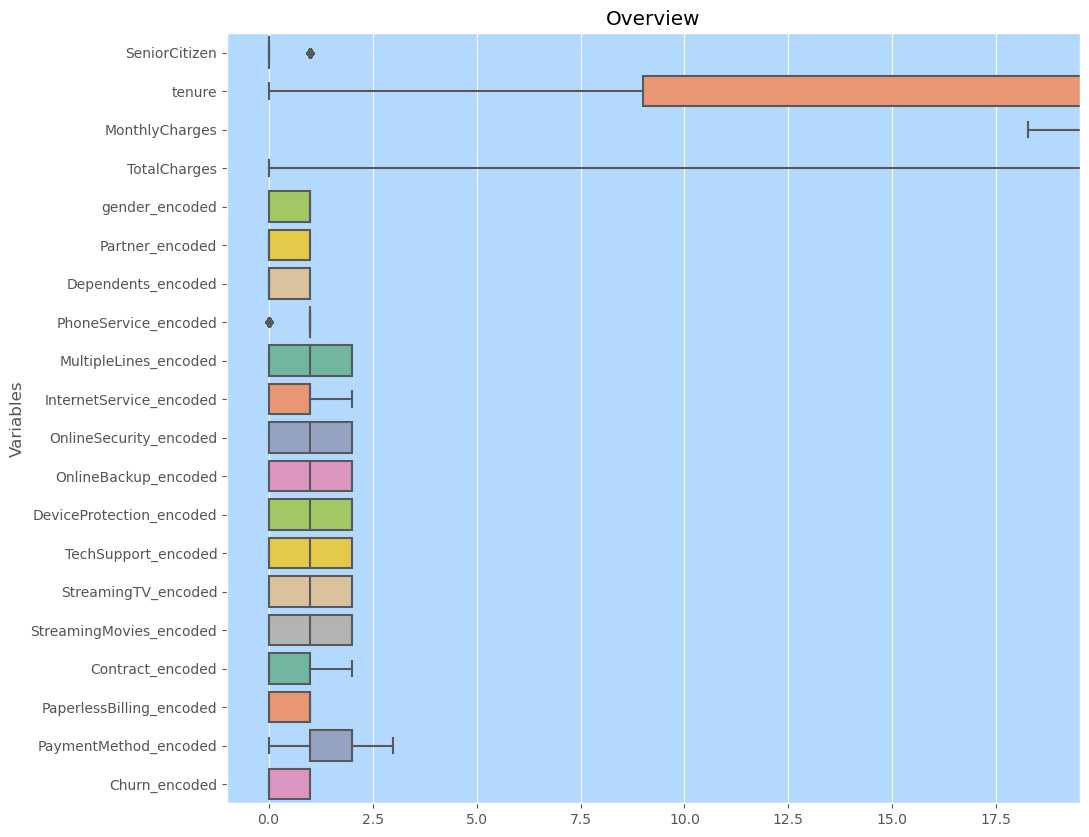

In [17]:
#box plot for looking at outliers

plt.style.use('ggplot') # using ggplot style

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#b3d9ff')
ax.set(xlim=(-1, len(df.columns)-0.5))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = df, # creating a box plot
  orient = 'h', 
  palette = 'Set2',)

In [18]:

df.dtypes

SeniorCitizen                 int64
tenure                        int64
MonthlyCharges              float64
TotalCharges                float64
gender_encoded                int32
Partner_encoded               int32
Dependents_encoded            int32
PhoneService_encoded          int32
MultipleLines_encoded         int32
InternetService_encoded       int32
OnlineSecurity_encoded        int32
OnlineBackup_encoded          int32
DeviceProtection_encoded      int32
TechSupport_encoded           int32
StreamingTV_encoded           int32
StreamingMovies_encoded       int32
Contract_encoded              int32
PaperlessBilling_encoded      int32
PaymentMethod_encoded         int32
Churn_encoded                 int32
dtype: object

In [19]:
# creating a DataFrame
DF = pd.DataFrame(df)

# save DataFrame to CSV file
DF.to_csv('tele.csv', index=False)


In [20]:
dff = pd.read_csv(r'C:\\Users\\villain\\OneDrive\\Desktop\\Data analytics\\data mining\\tele.csv')
dff

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7017,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7018,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7019,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [21]:
true_value=dff['Churn_encoded'].sum()
false_value= len(dff['Churn_encoded'])-true_value
print(true_value, false_value)

1857 5164


In [22]:
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             7021 non-null   int64  
 1   tenure                    7021 non-null   int64  
 2   MonthlyCharges            7021 non-null   float64
 3   TotalCharges              7021 non-null   float64
 4   gender_encoded            7021 non-null   int64  
 5   Partner_encoded           7021 non-null   int64  
 6   Dependents_encoded        7021 non-null   int64  
 7   PhoneService_encoded      7021 non-null   int64  
 8   MultipleLines_encoded     7021 non-null   int64  
 9   InternetService_encoded   7021 non-null   int64  
 10  OnlineSecurity_encoded    7021 non-null   int64  
 11  OnlineBackup_encoded      7021 non-null   int64  
 12  DeviceProtection_encoded  7021 non-null   int64  
 13  TechSupport_encoded       7021 non-null   int64  
 14  Streamin

In [23]:
dff.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026,0.504344,0.484546,0.300527,0.902863,0.943455,0.870816,0.790486,0.907278,0.905284,0.797607,0.986469,0.993591,0.692636,0.592651,1.570716,0.264492
std,0.368947,24.534965,30.069001,2266.855057,0.500017,0.499797,0.458520,0.296166,0.948575,0.737076,0.860730,0.880999,0.880787,0.862432,0.885762,0.885842,0.834163,0.491376,1.067530,0.441094
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.750000,403.350000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.400000,1400.550000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,0.000000,55.000000,89.900000,3801.700000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [24]:
# Splitting the dataset into training and testing sets
X = dff.drop('Churn_encoded', axis=1)
y = dff['Churn_encoded']
#standardizing the independent variables values
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.sum())
print(y_test.sum())

(4914, 19)
(2107, 19)
(4914,)
(2107,)
1306
551


In [26]:
# Creating the Random Forest classifier#############
skrfc = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt')

# Fitting the classifier to the training data
skrfc.fit(X_train, y_train)

# Predicting on the testing data
y_pred = skrfc.predict(X_test)


# Evaluating the model's performance
accuracy_rm = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rm)

f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

precision = precision_score(y_test, y_pred)
print("precision: ", precision)
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

Accuracy: 0.7831039392501187
F1 score: 0.5184404636459431
precision:  0.6180904522613065
recall:  0.44646098003629764


In [27]:
#Storing the result in a csv file
# creating a DataFrame
Telecus_RF_skl = pd.DataFrame(y_pred,columns=['TeleCusChurn_RF_sklPredictions'])

# save DataFrame to CSV file
Telecus_RF_skl.to_csv('TeleCusChurn_RFsklPredictions.csv', index=False)


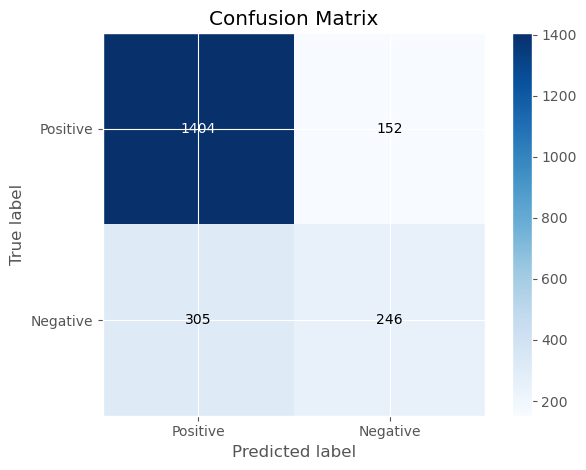

In [28]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [29]:
np.random.seed(123)
param_grid = {'n_neighbors': range(1, 21)}
# Create the k-NN classifier and perform grid search
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_predKNN = best_knn_model.predict(X_test)
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_predKNN)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(y_test, y_predKNN)
# print the F1 score
print("F1 score:", f1)
precision = precision_score(y_test, y_predKNN)
print("precision: ", precision)
recall = recall_score(y_test, y_predKNN)
print("recall: ", recall)




Accuracy: 77.55%
F1 score: 0.5284147557328016
precision:  0.5862831858407079
recall:  0.4809437386569873


In [30]:
# create a sample DataFrame
Telecus_knn = pd.DataFrame(y_predKNN,columns=['TeleCusChurn_KNN_sklPredictions'])

# save DataFrame to CSV file
Telecus_knn.to_csv('TeleCusChurn_KNN_sklPredictions.csv', index=False)

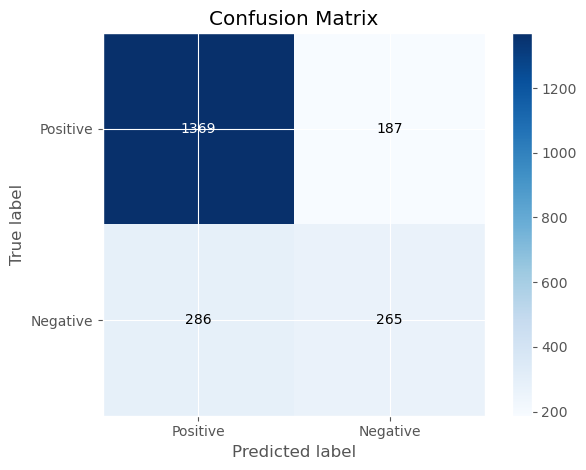

In [31]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_predKNN)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()